In [266]:
import math, random, numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import japanize_matplotlib

In [267]:
print(tf.config.list_physical_devices())  # CPU のみが表示されるはず
tf.random.set_seed(0); np.random.seed(0); random.seed(0)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## 時系列データの作成に挑戦(加法モデル: T + S + I)

In [268]:
N = 30
T: np.ndarray = np.arange(N)
S: np.ndarray = np.sin(T)
I: np.ndarray = np.array([random.uniform(1, 10) for _ in range(N)], dtype=np.float16)

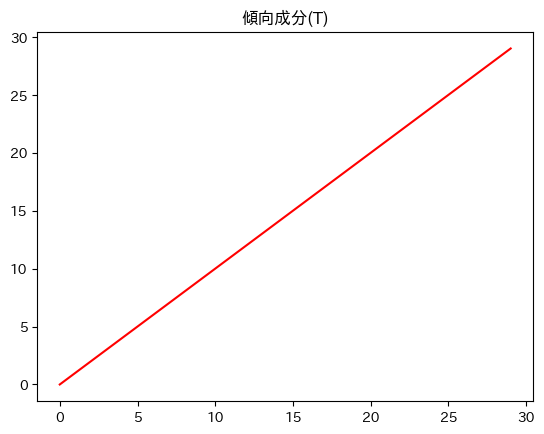

In [269]:
plt.plot(range(N), T, c="red")
plt.title("傾向成分(T)")
plt.show()

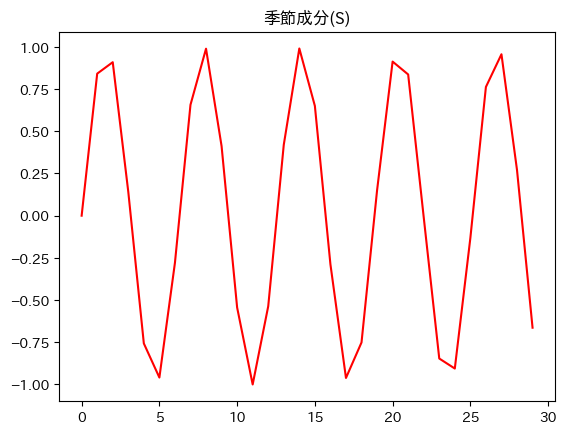

In [270]:
plt.plot(range(N), S, c="red")
plt.title("季節成分(S)")
plt.show()

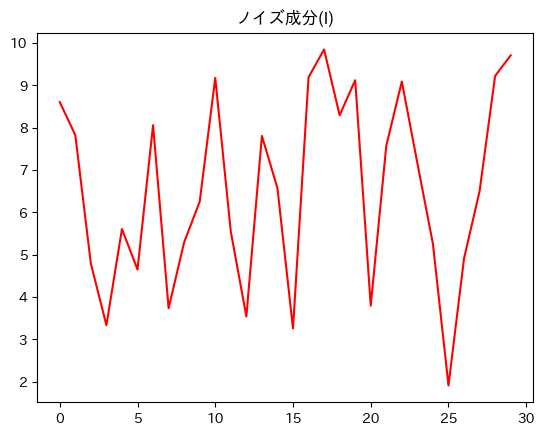

In [271]:
plt.plot(range(N), I, c="red")
plt.title("ノイズ成分(I)")
plt.show()

In [272]:
time_series_data = T + S + I

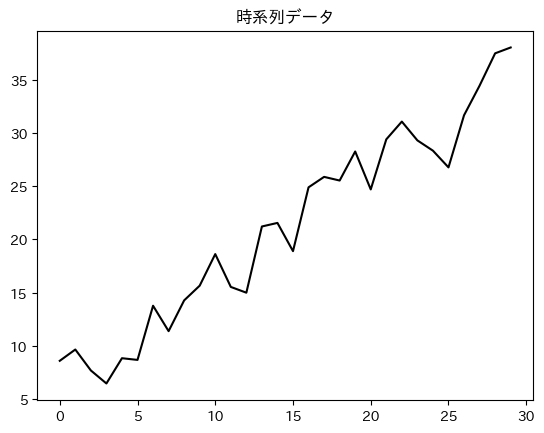

In [273]:
plt.plot(range(N), time_series_data, c="black")
plt.title("時系列データ")
plt.show()

## 上記で作ったオリジナルの時系列データを使って予測を行う

In [274]:
TIMESTEP = 10 # 過去10個のデータを使って、次のデータを予測する
N = 300

In [275]:
def make_series(N, TIMESTEP):
    X = []
    y = []

    for z in range(N):
        t = range(TIMESTEP + 1)
        s = np.sin(TIMESTEP + 1)
        i = np.array([random.uniform(0, 5) for _ in range(TIMESTEP + 1)])
        
        time_series_data = t + s + i

        X.append(time_series_data[:-1].reshape(-1, 1))
        y.append(time_series_data[-1])

    return np.array(X), np.array(y)

In [276]:
X, y = make_series(N, TIMESTEP)

In [277]:
X.shape, y.shape

((300, 10, 1), (300,))

In [278]:
n_tr = int(N * 0.8)
X_tr, y_tr, X_val, y_val = X[:n_tr], y[:n_tr], X[n_tr:], y[n_tr:]

In [279]:
X_tr.shape, y_tr.shape, X_val.shape, y_val.shape

((240, 10, 1), (240,), (60, 10, 1), (60,))

9.005723890021438
11.239857650627147
13.8192025233183


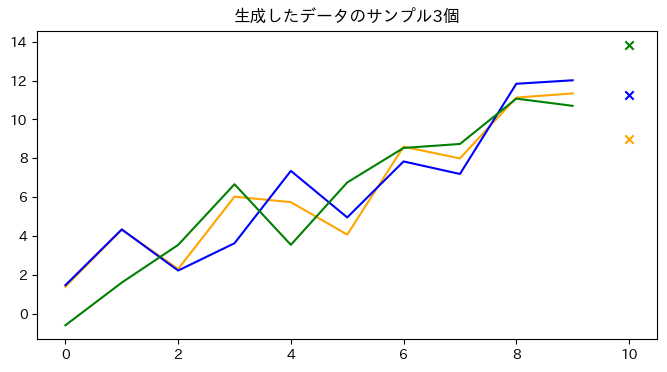

In [280]:
plt.figure(figsize=(8, 4))
colors = np.array(["orange", "blue", "green"])

for z in range(3):
    plt.plot(range(TIMESTEP), X_tr[z], c=colors[z])
    plt.scatter(10, y_tr[z], marker="x", c=colors[z])
    print(y_tr[z])
plt.title(f"生成したデータのサンプル{3}個")
plt.show()